<a href="https://colab.research.google.com/github/savichatz/DataAnalysis_SQL/blob/master/SQLDataStoryProject_CovidVaccineAndAdverseEffects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> **SQL Data Story Project on Covid Vaccine and Adverse effects** </center>

### What dataset have you considered?
The Vaccine Adverse Event Reporting System (VAERS) 
### Why this specific dataset? Any reason for it?
Yes, VAERS is a national early warning system to detect possible safety problems in U.S.-licensed vaccines. VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA)
### What VAERS does?
VAERS accepts and analyzes reports of adverse events (possible side effects) after a person has received a vaccination
### Who will feed data to VAERS Database?
Anyone can report an adverse event to VAERS. Healthcare professionals are required to report certain adverse events and vaccine manufacturers are required to report all adverse events that come to their attention.

## <center> **What is your story objective?**</center>

## <center> To highlight the risks due to covid vaccine in US </center>

###**What specific problem your data story talks about?**

####Understanding various combinations/patterns that leads to death

###**What is your hypothesis?**

####Lung related ailments may lead to higher mortality
####Lung related ailments lead to adverse effects post covid vaccine

### **What you want do with this hypothesis?**

One of US fellow friend is suffering with chronic lung illness  and worried about taking covid vaccine is safe or not. 
So as data analysts we want to advice him/her with all the possible data insights about his safety and assure him with the data facts 

In [ ]:
# Load some libraries we need
import pandas as pd
%load_ext google.colab.data_table
import sqlite3 as sql



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Mount Goole Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
% cd gdrive/MyDrive/Colab\ Notebooks

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


In [ ]:
#create empty database with anyname (it will automatically create this database in the google drive where this colab notebook is mounted)
import sqlite3
conn = sqlite3.connect('VARES.db')
c = conn.cursor()

In [ ]:
#connect to the database
db_conn = sql.connect("/content/gdrive/MyDrive/VARES.db")

During the same session you do not need to rerun any of the above, just run it once and you are good to go!
    

From now everytime you want to write SQL just copy and past this, write this:
```
pd.read_sql(
  """
        SQL HERE
        SQL HERE
        SQL HERE

  """, db_conn)
```


    

  

In [ ]:
#import csv to DataFrame
path1 = "/content/gdrive/MyDrive/data/2021VAERSDATA.csv"
path2 = "/content/gdrive/MyDrive/data/2021VAERSVAX.csv"
path3 = "/content/gdrive/MyDrive/data/2021VAERSSYMPTOMS.csv"
#fix unicode error while reading csv
df1 = pd.read_csv(path1, encoding="ISO-8859–1")
df2 = pd.read_csv(path2, encoding="ISO-8859–1")
df3 = pd.read_csv(path3, encoding="ISO-8859–1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,12,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##**What data tables contains in a brief?**

**1.Vaccinatedpeopledata** - Persons age,state,vaxdate,recovered,died,hospitalization,historyofsickness..etc <br /> 
**2.Vaccinedata** - What vaccine so and so person had taken (vaccinename,manufacturer,lotnumber..etc) <br /> 
**3.Symptomsdata** - What symptoms are reported for so and so person after vaccine 

In [ ]:
#convert the data from DataFrame to SQL table
df1.to_sql('patientdata', db_conn, if_exists='replace', index = False)
df2.to_sql('vaccinedata', db_conn, if_exists='replace', index = False)
df3.to_sql('symptomsdata', db_conn, if_exists='replace', index = False)
#You can change table_name to whatever you want to name your table as.
#If there is already a table with the same name, the content will be replaced by the new one

In [ ]:
#Selecting only covid related vaccines
pd.read_sql(
    """
      select distinct vax_manu,vax_name
      from vaccinedata where vax_name like '%covid%'
      --limit 3
    
    """, db_conn)

,VAX_MANU,VAX_NAME
0,MODERNA,COVID19 (COVID19 (MODERNA))
1,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
2,UNKNOWN MANUFACTURER,COVID19 (COVID19 (UNKNOWN))
3,JANSSEN,COVID19 (COVID19 (JANSSEN))


In [ ]:
#total count of covidvaccinated-33797
df_totvaccinated=pd.read_sql(
    """

      select count(DISTINCT p.vaers_id) as totalvaccinated
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%'
    

    """, db_conn)

In [ ]:
df_totvaccinated

,totalvaccinated
0,33797


In [ ]:
#total count of died after covid vaccination-1904
df_totdied=pd.read_sql(
    """

      select  count(DISTINCT p.vaers_id) as totaldied
      from patientdata p 
      join vaccinedata v on p.vaers_id=v.vaers_id
      --join symptomsdata s on s.vaers_id=p.vaers_id
      where v.vax_name like '%covid%' and p.died='Y'
    

    """, db_conn)


In [ ]:
df_totdied

,totaldied
0,1904


In [ ]:
  #total number of people with lung illness history
pd.read_sql(
      """
      select 
          
        Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
       
""",db_conn
  )

,total_bylunghistory
0,2706


In [ ]:
  #total number of people died with lung illness history
pd.read_sql(
      """
      select 
          
        Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died='Y'
""",db_conn
  )

,total_bylunghistory
0,248


In [ ]:
  #total number of people with COPD-lung illness history
  pd.read_sql(
      """
      select
        Count(DISTINCT p.vaers_id) as totalpeople
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.history like '%COPD%'
        --group by 1
       
""",db_conn
  )

,totalpeople
0,463


In [ ]:
  #total number of people died with COPD-lung illness history
  pd.read_sql(
      """
      select
        Count(DISTINCT p.vaers_id) as totalpeople
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.history like '%COPD%'
        and p.died='Y'
        --group by 1
       
""",db_conn
  )

,totalpeople
0,125


In [ ]:
#COPD -lung illness Total number of people vaccinated,died and percenatgedied by age
df_copd=pd.read_sql(
    """
      with totalCOPD_byage as
      (
      select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totalCOPDbyage
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' 
         and p.history like '%COPD%'
         group by 1
         ),
         TotaldiedCOPD_byage as
         (
           select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totaldiedwithCOPD_byage
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' 
         and p.history like '%COPD%'
         and p.died='Y'
         group by 1
         )

         select totalCOPD_byage.age_band,totalCOPDbyage,totaldiedwithCOPD_byage, 
         CAST(ROUND(totaldiedwithCOPD_byage*100.0/totalCOPDbyage,2) as decimal(5,2)) as percentagdiedwithCOPD from 
         totalCOPD_byage left join TotaldiedCOPD_byage on totalCOPD_byage.age_band=TotaldiedCOPD_byage.age_band
        
         group by 1
      """, db_conn
)

In [ ]:
df_copd.fillna(0)

,age_band,totalCOPDbyage,totaldiedwithCOPD_byage,percentagdiedwithCOPD
0,0-9,1,0.0,0.00
1,20-29,1,0.0,0.00
2,30-39,4,0.0,0.00
3,40-49,8,1.0,12.50
4,50-59,35,3.0,8.57
5,60-69,89,19.0,21.35
6,70-79,165,52.0,31.52
7,80-89,119,36.0,30.25
8,90-99,33,13.0,39.39
9,>100,1,1.0,100.00


In [ ]:
#Total number of people vaccinated,died and percenatgedied by age
pd.read_sql(
    """
              
      
        with totvaccinatedbyage as
        (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totalvaccinated_byage
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        --where ageage_band_yrs is not null
        group by age_band
        order by 2 desc
        ),
        diedbyage as
        (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totaldied_byage
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.died = "Y"
        group by age_band
        order by 2 desc
        )
        select totvaccinatedbyage.age_band,totalvaccinated_byage,totaldied_byage,
        CAST(ROUND(totaldied_byage*100.0/totalvaccinated_byage,2) as decimal(5,2)) as percentagediedbyage
        from totvaccinatedbyage
        left join diedbyage on totvaccinatedbyage.age_band=diedbyage.age_band
        group by 1 
    """, db_conn
)

,age_band,totalvaccinated_byage,totaldied_byage,percentagediedbyage
0,0-9,40,2,5.00
1,10-19,291,2,0.69
2,20-29,3188,11,0.35
3,30-39,6016,17,0.28
4,40-49,5709,36,0.63
5,50-59,5448,104,1.91
6,60-69,4201,272,6.47
7,70-79,3253,449,13.80
8,80-89,1898,548,28.87
9,90-99,675,318,47.11


In [ ]:
#LUNG Illness History-Total number of people vaccinated,died and percenatgedied by age
df_lung=pd.read_sql(
    """
              
      
      with totbylunghistory as
      (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
        
       group by 1
      ),
      diedbylunghistory as
      (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(distinct p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
        and p.died='Y' 
        
        group by 1
      )

     
      select totbylunghistory.age_band,total_bylunghistory,
            totaldied_bylunghistory,CAST(ROUND(totaldied_bylunghistory*100.0/total_bylunghistory,2) as decimal(5,2)) as percentagediedbylunghistory
      from totbylunghistory 
      left join diedbylunghistory on totbylunghistory.age_band=diedbylunghistory.age_band
      
      group by 1 
    """, db_conn
)

In [ ]:
df_lung.fillna(0)

,age_band,total_bylunghistory,totaldied_bylunghistory,percentagediedbylunghistory
0,0-9,2,0.0,0.00
1,10-19,22,1.0,4.55
2,20-29,260,0.0,0.00
3,30-39,410,2.0,0.49
4,40-49,455,3.0,0.66
5,50-59,476,11.0,2.31
6,60-69,363,43.0,11.85
7,70-79,391,86.0,21.99
8,80-89,216,67.0,31.02
9,90-99,68,34.0,50.00


In [ ]:
#AdverseEvet/Symptoms Onset in N number of days post Covid Vaccination for all people having-Alive
pd.read_sql(
    """

     with adverseevent as
     (
      select
      case
            when p.NUMDAYS is 0 then 'OnTheDayOfVaccination'
            when p.NUMDAYS is null then 'No AdverseEvent'
            when (p.NUMDAYS is not null and p.numdays is not 0) then p.Numdays
      end as AdverseEventAfterNDaysOfVaccination,count(distinct p.vaers_id) as totalalive_people
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%'  
      and p.died is  null
  
      group by 1
    ),
    totbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as total
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' 
        and p.died is  null
        --and (p.age_yrs >=50 and p.age_yrs<60)
     
      )
    select AdverseEventAfterNDaysOfVaccination,totalalive_people,CAST(ROUND(totalalive_people*100.0/sum(total),2) as decimal(5,2)) as percentagealivebylunghistory
    from adverseevent,totbylunghistory
    group by 1
    order by 2 desc
    limit 10
    """, db_conn)

,AdverseEventAfterNDaysOfVaccination,totalalive_people,percentagealivebylunghistory
0,OnTheDayOfVaccination,13103,41.08
1,1,7145,22.40
2,No AdverseEvent,2645,8.29
3,2,1690,5.30
4,7,1135,3.56
5,8,1000,3.14
6,3,910,2.85
7,4,705,2.21
8,6,591,1.85
9,5,585,1.83


In [ ]:
#AdverseEvet/Symptoms Onset in N number of days post Covid Vaccination for all people having-Alive Lung  Illness History
pd.read_sql(
    """

     with adverseevent as
     (
      select
      case
            when p.NUMDAYS is 0 then 'OnTheDayOfVaccination'
            when p.NUMDAYS is null then 'No AdverseEvent'
            when (p.NUMDAYS is not null and p.numdays is not 0) then p.Numdays
      end as AdverseEventAfterNDaysOfVaccination,count(distinct p.vaers_id) as totalalive_peoplelunghistory
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      and p.died is  null
  
      group by 1
    ),
    totbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died is  null
        --and (p.age_yrs >=50 and p.age_yrs<60)
     
      )
    select AdverseEventAfterNDaysOfVaccination,totalalive_peoplelunghistory,CAST(ROUND(totalalive_peoplelunghistory*100.0/sum(total_bylunghistory),2) as decimal(5,2)) as percentagealivebylunghistory
    from adverseevent,totbylunghistory
    group by 1
    order by 2 desc
    limit 10
    """, db_conn)

,AdverseEventAfterNDaysOfVaccination,totalalive_peoplelunghistory,percentagealivebylunghistory
0,OnTheDayOfVaccination,1070,43.53
1,1,606,24.65
2,2,141,5.74
3,7,79,3.21
4,8,77,3.13
5,3,75,3.05
6,No AdverseEvent,75,3.05
7,4,62,2.52
8,5,50,2.03
9,6,50,2.03


In [ ]:
#AdverseEvetOnset in how many days after vaccination -with all died 
pd.read_sql(
    """

     with adverseevent as
     (
      select
      case
            when p.NUMDAYS is 0 then 'OnTheDayOfVaccination'
            when p.NUMDAYS is null then 'No AdverseEvent'
            when (p.NUMDAYS is not null and p.numdays is not 0) then p.Numdays
      end as AdverseEventAfterNDaysOfVaccination,count(distinct p.vaers_id) as totdied_byadverse
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%'  
      and p.died ='Y'
      --and (p.age_yrs >=50 and p.age_yrs<60)
   
      group by 1
    ),
    died as
      (
        select Count(DISTINCT p.vaers_id) as totaldied
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'  
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
   
     
      )
    select AdverseEventAfterNDaysOfVaccination,totdied_byadverse,CAST(ROUND(totdied_byadverse*100.0/sum(totaldied),2) as decimal(5,2)) as percentagedied
    from adverseevent,died
    group by 1
    order by 2 desc
    limit 10

    """, db_conn)

,AdverseEventAfterNDaysOfVaccination,totdied_byadverse,percentagedied
0,1,369,19.38
1,OnTheDayOfVaccination,284,14.92
2,2,169,8.88
3,No AdverseEvent,121,6.36
4,3,115,6.04
5,4,96,5.04
6,5,73,3.83
7,7,65,3.41
8,9,50,2.63
9,6,49,2.57


In [ ]:
#AdverseEvetOnset in how many days after vaccination -with all died Lung  Illness History
pd.read_sql(
    """

     with adverseevent as
     (
      select
      case
            when p.NUMDAYS is 0 then 'OnTheDayOfVaccination'
            when p.NUMDAYS is null then 'No AdverseEvent'
            when (p.NUMDAYS is not null and p.numdays is not 0) then p.Numdays
      end as AdverseEventAfterNDaysOfVaccination,count(distinct p.vaers_id) as totaldied_peoplelunghistory
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      and p.died ='Y'
      --and (p.age_yrs >=50 and p.age_yrs<60)
   
      group by 1
    ),
    totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
   
     
      )
    select AdverseEventAfterNDaysOfVaccination,totaldied_peoplelunghistory,CAST(ROUND(totaldied_peoplelunghistory*100.0/sum(total_bylunghistory),2) as decimal(5,2)) as percentagediedbylunghistory
    from adverseevent,totdiedbylunghistory
    group by 1
    order by 2 desc
    limit 10

    """, db_conn)

,AdverseEventAfterNDaysOfVaccination,totaldied_peoplelunghistory,percentagediedbylunghistory
0,1,51,20.56
1,OnTheDayOfVaccination,43,17.34
2,2,24,9.68
3,3,18,7.26
4,4,18,7.26
5,5,12,4.84
6,9,12,4.84
7,8,10,4.03
8,6,8,3.23
9,7,7,2.82


In [ ]:
#symptoms analysis alive for all-Alive 
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died is null and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died is null and s.symptom2 is not null 
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died is null and s.symptom3 is not null
      group by 1
      ),
       fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died is null and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died is null and s.symptom5 is not null
      group by 1
      ),
      alllunghistory as
      (
        select 
        Count(DISTINCT p.vaers_id) as totalalive_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.died is null 
      ),
      symptomsofallalive as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      )
      select symptom,sum(people) as people, CAST(ROUND(people*100.0/totalalive_bylunghistory,2) as decimal(5,2)) as percentage 
      from symptomsofallalive,alllunghistory
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,symptom,people,percentage
0,Chills,5477,10.10
1,Headache,7194,6.79
2,Arthralgia,2089,6.02
3,Fatigue,5144,5.36
4,Dizziness,3441,4.51
5,Injection site erythema,2224,4.43
6,Pyrexia,5724,3.99
7,Pain,4752,3.65
8,Asthenia,1439,3.30
9,Nausea,4077,3.17


In [ ]:
#symptoms analysis all -dead 
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died ='Y' and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died ='Y' and s.symptom2 is not null
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died ='Y' and s.symptom3 is not null
      group by 1
      ),
      fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'
      and p.died ='Y' and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%'  
      and p.died ='Y' and s.symptom5 is not null
      group by 1
      ),
      
      symptomsofalldied as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      ),

         totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        )
      select Symptom,sum(people) as people, CAST(ROUND(people*100.0/totaldied_bylunghistory,2) as decimal(5,2)) as PercentageDied
       from symptomsofalldied,totdiedbylunghistory 
       --where symptom is not like '%Death%'
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,symptom,people,PercentageDied
0,Death,1597,49.26
1,Cardiac arrest,153,4.73
2,COVID-19,112,4.36
3,Asthenia,92,3.36
4,Dyspnoea,175,3.15
5,Unresponsive to stimuli,194,2.57
6,SARS-CoV-2 test positive,123,1.94
7,Autopsy,38,1.73
8,Resuscitation,100,1.68
9,Fatigue,93,1.52


In [ ]:
#symptoms analysis alive for all-Alive lung history
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom2 is not null 
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom3 is not null
      group by 1
      ),
       fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom5 is not null
      group by 1
      ),
      alllunghistory as
      (
        select 
        Count(DISTINCT p.vaers_id) as totalalive_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died is null 
      ),
      symptomsofallalive as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      )
      select Symptom,sum(people) as people, CAST(ROUND(people*100.0/totalalive_bylunghistory,2) as decimal(5,2)) as PercentageAlivePeople_LungIllness 
      from symptomsofallalive,alllunghistory
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,symptom,people,PercentageAlivePeople_LungIllness
0,Chills,463,8.99
1,Arthralgia,198,7.16
2,Headache,585,5.82
3,Fatigue,475,5.49
4,Dizziness,296,4.72
5,Pyrexia,482,4.48
6,Asthenia,164,4.35
7,Dyspnoea,373,4.31
8,Injection site erythema,171,3.78
9,Pain,394,3.66


In [ ]:
#symptoms analysis all -dead lung history
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      and p.died ='Y' and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      and p.died ='Y' and s.symptom2 is not null
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      and p.died ='Y' and s.symptom3 is not null
      group by 1
      ),
      fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      and p.died ='Y' and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
      and p.died ='Y' and s.symptom5 is not null
      group by 1
      ),
      
      symptomsofalldied as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      ),

         totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        )
      select symptom as Symptom,sum(people) as people, CAST(ROUND(people*100.0/totaldied_bylunghistory,2) as decimal(5,2)) as PercentageOfDiedPeople_LungIllness 
       from symptomsofalldied,totdiedbylunghistory 
       --where symptom is not like '%Death%'
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,Symptom,people,PercentageOfDiedPeople_LungIllness
0,Death,213,39.92
1,Cardiac arrest,23,6.85
2,Condition aggravated,17,5.24
3,Dyspnoea,33,4.84
4,Asthenia,14,3.63
5,General physical health deterioration,11,3.23
6,COVID-19,10,2.82
7,Resuscitation,19,2.82
8,Unresponsive to stimuli,20,2.82
9,Oxygen saturation decreased,14,2.42


In [ ]:
#symptoms analysis for all alive COPD history
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%COPD%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom2 is not null 
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%COPD%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom3 is not null
      group by 1
      ),
       fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%COPD%') 
      --and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom5 is not null
      group by 1
      ),
      alllunghistory as
      (
        select 
        Count(DISTINCT p.vaers_id) as totalalive_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
      (P.history LIKE '%COPD%') 
        and p.died is null 
      ),
      symptomsofallalive as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      )
      select Symptom,people, CAST(ROUND(people*100.0/totalalive_bylunghistory,2) as decimal(5,2)) as PercentageOfPeople_COPD 
      from symptomsofallalive,alllunghistory
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,symptom,people,PercentageOfPeople_COPD
0,Asthenia,23,6.80
1,Dyspnoea,21,6.21
2,Arthralgia,17,5.03
3,Chills,14,4.14
4,Pyrexia,14,4.14
5,COVID-19,13,3.85
6,Fatigue,12,3.55
7,Headache,12,3.55
8,Condition aggravated,11,3.25
9,Pain,11,3.25


In [ ]:
#symptoms analysis all dead -COPD illness
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%COPD%') 
      and p.died ='Y' and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%')  
      and p.died ='Y' and s.symptom2 is not null
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%') 
      and p.died ='Y' and s.symptom3 is not null
      group by 1
      ),
      fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
      (P.history LIKE '%COPD%') 
      and p.died ='Y' and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%') 
      and p.died ='Y' and s.symptom5 is not null
      group by 1
      ),
      
      symptomsofalldied as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      ),

         totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
       (P.history LIKE '%COPD%') 
        and p.died ='Y'
        )
      select symptom as Symptom,people, CAST(ROUND(people*100.0/totaldied_bylunghistory,2) as decimal(5,2)) as PercentageDied_COPD 
       from symptomsofalldied,totdiedbylunghistory
      group by 1
      order by 3 desc
      limit 20
    """, db_conn)

,Symptom,people,PercentageDied_COPD
0,Death,51,40.8
1,Cardiac arrest,14,11.2
2,Condition aggravated,9,7.2
3,Asthenia,7,5.6
4,Dyspnoea,7,5.6
5,Oxygen saturation decreased,5,4.0
6,Resuscitation,5,4.0
7,Unresponsive to stimuli,5,4.0
8,Acute kidney injury,4,3.2
9,Endotracheal intubation,4,3.2


In [ ]:
#joining ALL by AGE
df=pd.read_sql(
    """
              
        with vaccinatedbyage as
        (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totalvaccinated_byage
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        --where ageage_band_yrs is not null
        group by age_band
        order by 2 desc
        ),
     
        diedbyage as
        (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as totaldied_byage
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        and p.died = "Y"
        group by age_band
        order by 2 desc
        ),
      totbylunghistory as
      (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
       group by 1
      ),
      diedbylunghistory as
      (
        select 
          case
            when p.age_yrs between 0 and 9 then '0-9'
            when p.age_yrs between 10 and 19 then '10-19'
            when p.age_yrs between 20 and 29 then '20-29'
            when p.age_yrs between 30 and 39 then '30-39'
            when p.age_yrs between 40 and 49 then '40-49'
            when p.age_yrs between 50 and 59 then '50-59'
            when p.age_yrs between 60 and 69 then '60-69'
            when p.age_yrs between 70 and 79 then '70-79'
            when p.age_yrs between 80 and 89 then '80-89'
            when p.age_yrs between 90 and 99 then '90-99'
            when p.age_yrs >= 100  then '>100'
            when p.age_yrs is null then 'MissingAge'

        END as age_band, 
        Count(distinct p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
        and p.died='Y' 
        group by 1
      )

     
      select vaccinatedbyage.age_band,totalvaccinated_byage,
            totaldied_byage,CAST(ROUND(totaldied_byage*100.0/totalvaccinated_byage,2) as decimal(5,2)) as percentagediedbyage,
            total_bylunghistory,
            totaldied_bylunghistory,CAST(ROUND(totaldied_bylunghistory*100.0/total_bylunghistory,2) as decimal(5,2)) as percentagediedbylunghistory
      from vaccinatedbyage
      left join diedbyage on vaccinatedbyage.age_band=diedbyage.age_band
      left join totbylunghistory on vaccinatedbyage.age_band=totbylunghistory.age_band
      left join diedbylunghistory on vaccinatedbyage.age_band=diedbylunghistory.age_band
      
      group by 1 
    """, db_conn
)

In [ ]:
df

,age_band,totalvaccinated_byage,totaldied_byage,percentagediedbyage,total_bylunghistory,totaldied_bylunghistory,percentagediedbylunghistory
0,0-9,40,2,5.00,2,NaN,NaN
1,10-19,291,2,0.69,22,1.0,4.55
2,20-29,3188,11,0.35,260,NaN,NaN
3,30-39,6016,17,0.28,410,2.0,0.49
4,40-49,5709,36,0.63,455,3.0,0.66
5,50-59,5448,104,1.91,476,11.0,2.31
6,60-69,4201,272,6.47,363,43.0,11.85
7,70-79,3253,449,13.80,391,86.0,21.99
8,80-89,1898,548,28.87,216,67.0,31.02
9,90-99,675,318,47.11,68,34.0,50.00


In [ ]:
df = df.set_index('age_band')

In [ ]:
df

,totalvaccinated_byage,percentagevaccinatedbyage,totaldied_byage,percentagediedbyage,total_bylunghistory,percentagebylunghistory,totaldied_bylunghistory,percentagediedbylunghistory
age_band,,,,,,,,
0-9,40,0.12,2,5.00,2.0,5.00,NaN,NaN
10-19,291,0.86,2,0.69,22.0,7.56,1.0,4.55
20-29,3188,9.43,11,0.35,260.0,8.16,NaN,NaN
30-39,6016,17.80,17,0.28,403.0,6.70,2.0,0.50
40-49,5709,16.89,36,0.63,447.0,7.83,3.0,0.67
50-59,5448,16.12,104,1.91,467.0,8.57,10.0,2.14
60-69,4201,12.43,272,6.47,336.0,8.00,31.0,9.23
70-79,3253,9.63,449,13.80,336.0,10.33,63.0,18.75
80-89,1898,5.62,548,28.87,171.0,9.01,44.0,25.73


In [ ]:
df = pd.DataFrame(dict(
        age_band='0-9;10-19;20-29;30-39;40-49;50-59;60-69;70-79;80-89;90-99;>100;MissingAge'.split(';'),
        Totalbylunghisotry=df['total_bylunghistory'],
        Totdiedbylunghistory=df['totaldied_bylunghistory']
    ))

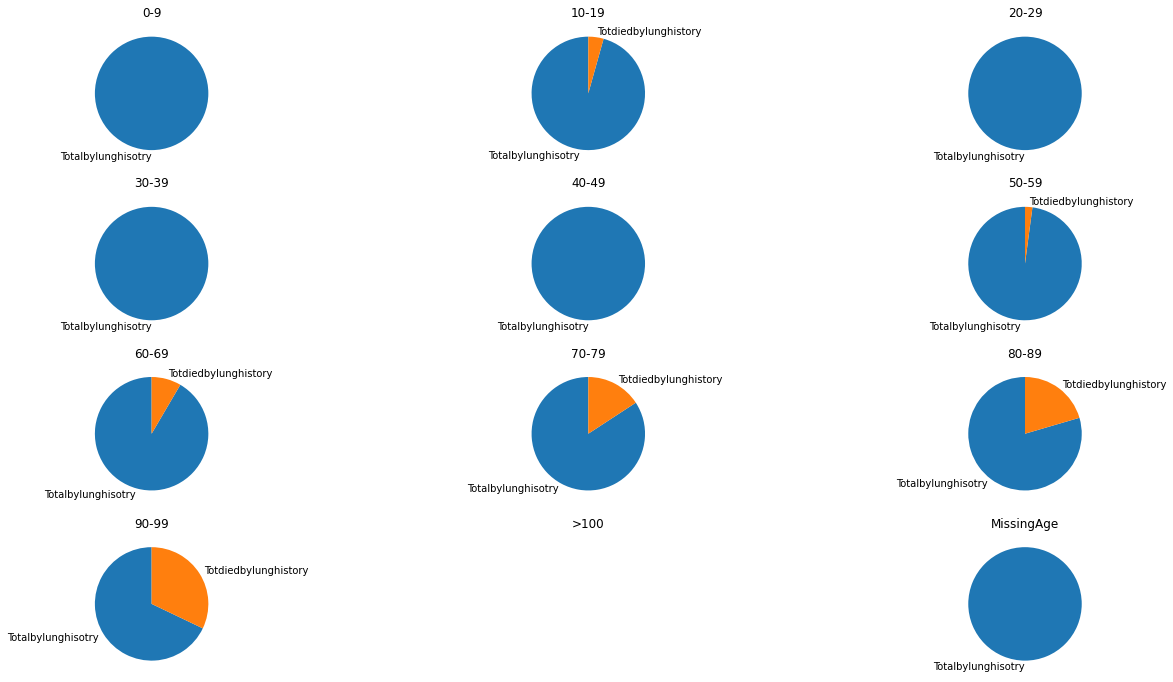

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(20, 12))

for i, (idx, row) in enumerate(df.set_index('age_band').iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=90)
    ax.set_title(idx)
  

fig.subplots_adjust(wspace=.8)

In [ ]:
df3=df[['age_band', 'total_bylunghistory','totaldied_bylunghistory','percentagediedbylunghistory']].fillna(0)

In [ ]:
df3

,age_band,total_bylunghistory,totaldied_bylunghistory,percentagediedbylunghistory
0,0-9,2.0,0.0,0.00
1,10-19,22.0,1.0,4.55
2,20-29,260.0,0.0,0.00
3,30-39,403.0,2.0,0.50
4,40-49,447.0,3.0,0.67
5,50-59,467.0,10.0,2.14
6,60-69,336.0,31.0,9.23
7,70-79,336.0,63.0,18.75
8,80-89,171.0,44.0,25.73
9,90-99,55.0,26.0,47.27


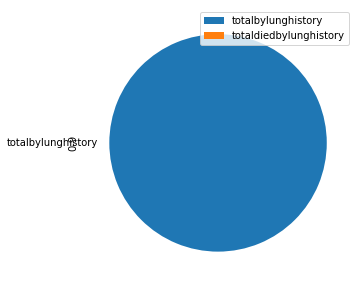

In [ ]:
df1 = pd.DataFrame({'0-9': [df['total_bylunghistory'][0],df['totaldied_bylunghistory'][0]]},
                  index=['totalbylunghistory', 'totaldiedbylunghistory'])
plot = df1.plot.pie(y='0-9', figsize=(10, 5))

In [ ]:
df['total_bylunghistory'] = pd.to_numeric(df['total_bylunghistory'])
df['totaldied_bylunghistory'] = pd.to_numeric(df['totaldied_bylunghistory'])

In [ ]:
df['total_bylunghistory'].dtypes

dtype('float64')

In [ ]:
df['age_band'] = df['age_band'].astype('str') 

In [ ]:
df['age_band'].dtypes

dtype('O')

In [ ]:
pd.read_sql(
    """
    select distinct p.vaers_id,p.history,p.symptom_text,p.vax_date,p.datedied,p.NUMDAYS,v.vax_name,p.CUR_ILL,p.LAB_DATA,p.L_THREAT from patientdata p
    join vaccinedata v  on p.vaers_id=v.vaers_id
    
        where v.vax_name like '%covid%' 
    and p.age_yrs>=30 and p.age_yrs<40 and p.died = 'Y'
     and (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
    
    """, db_conn
)

,VAERS_ID,HISTORY,SYMPTOM_TEXT,VAX_DATE,DATEDIED,NUMDAYS,VAX_NAME,CUR_ILL,LAB_DATA,L_THREAT
0,948418,"Per patient health history: hearing loss, asth...",Expired on 1/12/2021; unknown cause of death,01/07/2021,01/12/2021,5.0,COVID19 (COVID19 (PFIZER-BIONTECH)),Received 1st Covid vaccine 12/18/2020; 2nd 1/7...,Autopsy pending;,None
1,986901,Optic neuritis; asthma,Patient received vaccine uneventfully with no ...,01/28/2021,01/29/2021,0.0,COVID19 (COVID19 (PFIZER-BIONTECH)),None,Autopsy pending,None


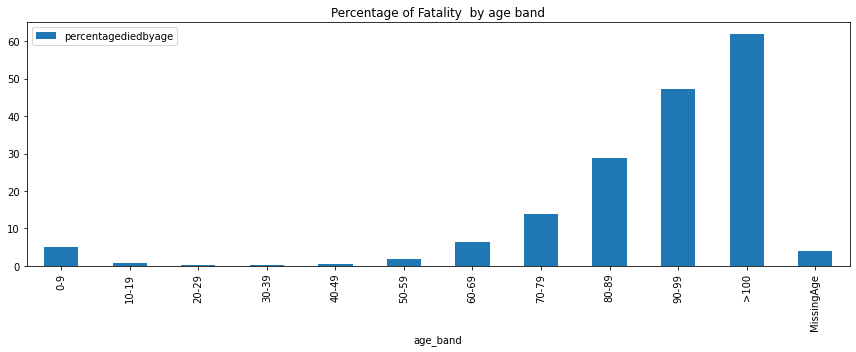

In [ ]:
df.plot(x ='age_band', y=['percentagediedbyage'], kind = 'bar',figsize=(12,5)) 
plt.title('Percentage of Fatality  by age band')
plt.show()


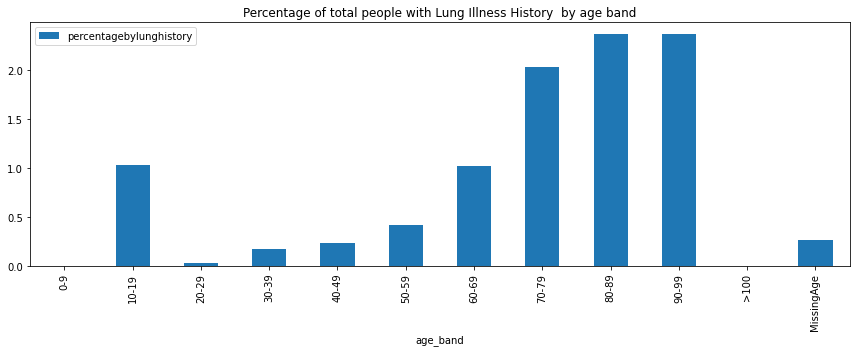

In [ ]:
df.plot(x ='age_band', y=['percentagebylunghistory'], kind = 'bar',figsize=(12,5)) 
plt.title('Percentage of total people with Lung Illness History  by age band')
plt.show()

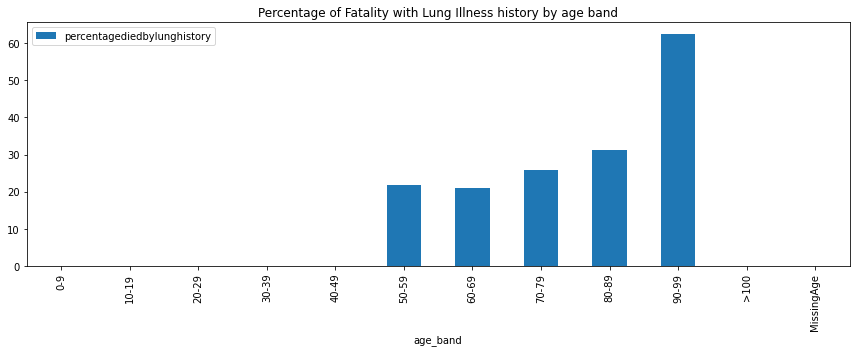

In [ ]:
df.plot(x ='age_band', y=['percentagediedbylunghistory'], kind = 'bar',figsize=(12,5)) 
plt.title('Percentage of Fatality with Lung Illness history by age band')
plt.show()

In [ ]:
--[]

In [ ]:
--plt.pie(df['percentagevaccinatedbyage'], labels = df['age_band'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


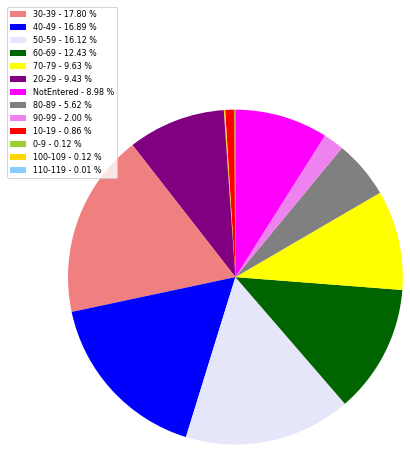

In [ ]:
x = df['age_band']
y = df['percentagevaccinatedbyage']
colors = ['yellowgreen','red','gold','lightskyblue','purple','lightcoral','blue','lavender', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=2.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [ ]:
df.plot(x ='age_band', y='percentagediedbyage', kind = 'bar',figsize=(12,5))
plt.title('Percentage of people died by age band')
plt.show()

In [ ]:
#After how many days people died with all died
df_alldied=pd.read_sql(
    """
      select
            distinct p.vaers_id,p.vax_date,p.datedied
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' 
      and p.died ='Y'
      --and (p.age_yrs >=50 and p.age_yrs<60)
  

    """, db_conn)

In [ ]:
df_alldied['vaxdate'] = pd.to_datetime(df_alldied['VAX_DATE'], format='%m/%d/%Y')
df_alldied['dieddate'] = pd.to_datetime(df_alldied['DATEDIED'], format='%m/%d/%Y')

In [ ]:
df_alldied['diff_days'] =(df_alldied['dieddate']-df_alldied['vaxdate']).dt.days

In [ ]:
df_alldied.to_sql('DiedDays_Overall', db_conn, if_exists='replace', index = False)

In [ ]:
#People died Overall in N Number of days post Covid vaccine 
pd.read_sql(
    """
      with daysdiedaftervax as
      (
      select diff_days as NumberofDays,count(distinct vaers_id) as NumberofDied from DiedDays_Overall 
      group by 1
      order by 2 desc 
     
      ),
      totdied as
      (
        select Count(DISTINCT p.vaers_id) as totaldied
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' 
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        
        )
        select NumberofDays, NumberofDied,CAST(ROUND(NumberofDied*100.0/sum(totaldied),2) as decimal(5,2)) as PercentageDied
        from daysdiedaftervax,totdied
        group by 1
        order by 2 desc
        limit 20
    """, db_conn
)


,NumberofDays,NumberofDied,PercentageDied
0,1.0,242,12.71
1,2.0,163,8.56
2,NaN,157,8.25
3,0.0,123,6.46
4,3.0,113,5.93
5,4.0,100,5.25
6,5.0,80,4.20
7,7.0,75,3.94
8,6.0,62,3.26
9,9.0,55,2.89


In [ ]:
#After how many days people died -died with COPD lung history illness 
df_COPD=pd.read_sql(
    """
      select
            distinct p.vaers_id,p.vax_date,p.datedied
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and 
        P.history LIKE '%COPD%'
      and p.died ='Y'

    """, db_conn)

In [ ]:
df_COPD['vaxdate'] = pd.to_datetime(df_COPD['VAX_DATE'], format='%m/%d/%Y')
df_COPD['dieddate'] = pd.to_datetime(df_COPD['DATEDIED'], format='%m/%d/%Y')

In [ ]:
df_COPD['diff_days'] =(df_COPD['dieddate']-df_COPD['vaxdate']).dt.days

In [ ]:
df_COPD.to_sql('DiedDaysWithCOPD', db_conn, if_exists='replace', index = False)

In [ ]:
#People having COPD died in N Number of days post Covid vaccine 
pd.read_sql(
    """
      with daysdiedaftervax as
      (
      select diff_days as NumberofDays,count(distinct vaers_id) as NumberofDied from DiedDaysWithCOPD
      group by 1
      order by 2 desc 
     
      ),
      totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_byCOPD
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          P.history LIKE '%COPD%' 
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        
        )
        select NumberofDays, NumberofDied,CAST(ROUND(NumberofDied*100.0/sum(totaldied_byCOPD),2) as decimal(5,2)) as PercentageDied_COPD
        from daysdiedaftervax,totdiedbylunghistory 
        group by 1
        order by 2 desc
        limit 20
    """, db_conn
)


,NumberofDays,NumberofDied,PercentageDied_COPD
0,1.0,23,18.4
1,2.0,13,10.4
2,5.0,11,8.8
3,3.0,10,8.0
4,0.0,9,7.2
5,NaN,6,4.8
6,7.0,6,4.8
7,4.0,5,4.0
8,6.0,5,4.0
9,8.0,4,3.2


In [ ]:
#After how many days people died -died with lung history illness -
df=pd.read_sql(
    """
      select
            distinct p.vaers_id,p.vax_date,p.datedied
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and 
        (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%')
      and p.died ='Y'
      --and (p.age_yrs >=50 and p.age_yrs<60)
  

    """, db_conn)

In [ ]:
df

,VAERS_ID,VAX_DATE,DATEDIED
0,918065,12/30/2020,01/01/2021
1,920326,12/29/2020,01/01/2021
2,920368,12/29/2020,01/01/2021
3,920545,01/04/2021,01/04/2021
4,921175,01/03/2021,01/05/2021
...,...,...,...
243,1111389,02/24/2021,03/16/2021
244,1111546,03/02/2021,03/14/2021
245,1111957,03/03/2021,03/07/2021
246,1112164,03/04/2021,03/07/2021


In [ ]:
df['vaxdate'] = pd.to_datetime(df['VAX_DATE'], format='%m/%d/%Y')
df['dieddate'] = pd.to_datetime(df['DATEDIED'], format='%m/%d/%Y')

In [ ]:
df['diff_days'] =(df['dieddate']-df['vaxdate']).dt.days

In [ ]:
df

,VAERS_ID,VAX_DATE,DATEDIED,vaxdate,dieddate,diff_days
0,918065,12/30/2020,01/01/2021,2020-12-30,2021-01-01,2.0
1,920326,12/29/2020,01/01/2021,2020-12-29,2021-01-01,3.0
2,920368,12/29/2020,01/01/2021,2020-12-29,2021-01-01,3.0
3,920545,01/04/2021,01/04/2021,2021-01-04,2021-01-04,0.0
4,921175,01/03/2021,01/05/2021,2021-01-03,2021-01-05,2.0
...,...,...,...,...,...,...
243,1111389,02/24/2021,03/16/2021,2021-02-24,2021-03-16,20.0
244,1111546,03/02/2021,03/14/2021,2021-03-02,2021-03-14,12.0
245,1111957,03/03/2021,03/07/2021,2021-03-03,2021-03-07,4.0
246,1112164,03/04/2021,03/07/2021,2021-03-04,2021-03-07,3.0


In [ ]:
df.to_sql('DiedDaysWithLungHistory', db_conn, if_exists='replace', index = False)

In [ ]:
pd.read_sql(
    """
      select diff_days,count(distinct vaers_id) from DiedDaysWithLungHistory
      group by 1
      order by 2 desc 
      limit 20
    """, db_conn
)

,diff_days,count(distinct vaers_id)
0,1.0,39
1,2.0,22
2,3.0,21
3,0.0,17
4,5.0,17
5,4.0,15
6,8.0,13
7,9.0,10
8,13.0,10
9,NaN,9


In [ ]:
#People having COPD Lung Illness History died in N Number of days post Covid vaccine 
pd.read_sql(
    """
      with daysdiedaftervax as
      (
      select diff_days as NumberofDays,count(distinct vaers_id) as NumberofDied from DiedDaysWithLungHistory 
      group by 1
      order by 2 desc 
     
      ),
      totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          P.history LIKE '%COPD%'
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        
        )
        select NumberofDays, NumberofDied,CAST(ROUND(NumberofDied*100.0/sum(totaldied_bylunghistory),2) as decimal(5,2)) as PercentageDied_LungIllness
        from daysdiedaftervax,totdiedbylunghistory 
        group by 1
        order by 2 desc
        limit 20
    """, db_conn
)

,NumberofDays,NumberofDied,PercentageDied_LungIllness
0,1.0,39,31.2
1,2.0,22,17.6
2,3.0,21,16.8
3,0.0,17,13.6
4,5.0,17,13.6
5,4.0,15,12.0
6,8.0,13,10.4
7,9.0,10,8.0
8,13.0,10,8.0
9,NaN,9,7.2


In [ ]:
#People having Lung Illness History died in N Number of days post Covid vaccine 
pd.read_sql(
    """
      with daysdiedaftervax as
      (
      select diff_days as NumberofDays,count(distinct vaers_id) as NumberofDied from DiedDaysWithLungHistory 
      group by 1
      order by 2 desc 
     
      ),
      totdiedbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as totaldied_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and 
          (P.history LIKE '%lung%' or  P.history LIKE '%pulm%' or P.history LIKE '%asthma%' or P.history LIKE '%COPD%'
        or P.history LIKE '%bronchitis%' or P.history LIKE '%Emphysema%' or P.history LIKE '%Cystic fibrosis%' or P.history LIKE '%tuberculosis%'
        or P.history LIKE '%breathing%' or P.history LIKE '%respirat%' or P.history LIKE '%pneumothorax%' or P.history LIKE '%atelectasis%' or p.history like '%pneumonia%') 
        and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        
        )
        select NumberofDays, NumberofDied,CAST(ROUND(NumberofDied*100.0/sum(totaldied_bylunghistory),2) as decimal(5,2)) as PercentageDied_LungIllness
        from daysdiedaftervax,totdiedbylunghistory 
        group by 1
        order by 2 desc
       -- limit 20
    """, db_conn
)


,NumberofDays,NumberofDied,PercentageDied_LungIllness
0,1.0,39,15.73
1,2.0,22,8.87
2,3.0,21,8.47
3,0.0,17,6.85
4,5.0,17,6.85
5,4.0,15,6.05
6,8.0,13,5.24
7,9.0,10,4.03
8,13.0,10,4.03
9,NaN,9,3.63


In [ ]:
#hospitalisation days by all alive with lunghistory
pd.read_sql(
    """

     with hospbylunghistory as
     (
      select
      case
            when p.hospdays is null then 'NotHospitalised'
            when p.hospdays is not null then p.hospdays
      end as NumberOfHospitalDays,count(distinct p.vaers_id) as hosp_bylunghistory
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and p.died is  null
      --and (p.age_yrs >=50 and p.age_yrs<60)
       and p.vaers_id not in
        (
        select p.vaers_id 
        from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and P.history LIKE '%heart%' 
        )
      group by 1
    ),
    totbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%') and p.died is  null
        --and (p.age_yrs >=50 and p.age_yrs<60)
        and p.vaers_id not in
        (
        select p.vaers_id 
        from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and P.history LIKE '%heart%' 
       
        )
     
      )
    select NumberOfHospitalDays,hosp_bylunghistory,CAST(ROUND(hosp_bylunghistory*100.0/sum(total_bylunghistory),2) as decimal(5,2)) as percentagevaccinatedbyage
    from hospbylunghistory,totbylunghistory
    group by 1
    order by 3 desc

    """, db_conn)

,NumberOfHospitalDays,hosp_bylunghistory,percentagevaccinatedbyage
0,NotHospitalised,128,73.99
1,1,10,5.78
2,2,10,5.78
3,3,6,3.47
4,5,6,3.47
5,4,4,2.31
6,6,4,2.31
7,7,2,1.16
8,8,1,0.58
9,21,1,0.58


In [ ]:
#hospitalisation days by all died with lunghistory
pd.read_sql(
    """

     with hospbylunghistory as
     (
      select
      case
            when p.hospdays is null then 'NotHospitalised'
            when p.hospdays is not null then p.hospdays
      end as NumberOfHospitalDays,count(distinct p.vaers_id) as hosp_bylunghistory
      from patientdata p join vaccinedata v on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and p.died ='Y'
      --and (p.age_yrs >=50 and p.age_yrs<60)
       and p.vaers_id not in
        (
        select p.vaers_id 
        from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and P.history LIKE '%heart%' 
        )
      group by 1
    ),
    totbylunghistory as
      (
        select Count(DISTINCT p.vaers_id) as total_bylunghistory
        from patientdata p 
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%') and p.died ='Y'
        --and (p.age_yrs >=50 and p.age_yrs<60)
        and p.vaers_id not in
        (
        select p.vaers_id 
        from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%' and P.history LIKE '%heart%' 
       
        )
     
      )
    select NumberOfHospitalDays,hosp_bylunghistory,CAST(ROUND(hosp_bylunghistory*100.0/sum(total_bylunghistory),2) as decimal(5,2)) as percentagevaccinatedbyage
    from hospbylunghistory,totbylunghistory
    group by 1
    order by 3 desc

    """, db_conn)

,NumberOfHospitalDays,hosp_bylunghistory,percentagevaccinatedbyage
0,NotHospitalised,41,74.55
1,2,4,7.27
2,1,2,3.64
3,3,2,3.64
4,11,2,3.64
5,6,1,1.82
6,10,1,1.82
7,12,1,1.82
8,19,1,1.82


In [ ]:
print(df)

In [ ]:
#symptoms analysis alive 50-59
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died is null and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died is null and s.symptom3 is not null 
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died is null and s.symptom5 is not null
      group by 1
      ),
       fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<59)
      and p.died is null and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died is null and s.symptom5 is not null
      group by 1
      ),
      
      symptomsofallalive as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      )
      select symptom,sum(people) as people from symptomsofallalive
      group by 1
      order by 2 desc
      --limit 10
    """, db_conn)

,symptom,people
0,Pyrexia,6
1,Chills,4
2,Headache,4
3,Feeling hot,3
4,Flushing,3
...,...,...
65,Sputum abnormal,1
66,Sputum culture,1
67,Thirst,1
68,Urine analysis,1


In [ ]:
#symptoms analysis dead 50-59
pd.read_sql(
    """
      with firstsymptom as
      (
      select s.symptom1 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died ='Y' and s.symptom1 is not null
      group by 1
      ),
      secondsymptom as
      (
      select s.symptom2 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died ='Y' and s.symptom2 is not null
      group by 1
      ),
      thirdsymptom as
      (
      select s.symptom3 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died ='Y' and s.symptom3 is not null
      group by 1
      ),
      fourthsymptom as
      (
      select s.symptom4 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died ='Y' and s.symptom4 is not null
      group by 1
      ),
      fifthsymptom as
      (
      select s.symptom5 as symptom,count(distinct s.vaers_id) as count
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died ='Y' and s.symptom5 is not null
      group by 1
      ),
      
      symptomsofalldied as(
      select symptom,count as people from firstsymptom 
      union
      select symptom,count as people from secondsymptom
      union
      select symptom,count as people from thirdsymptom
      union
      select symptom,count as people from fourthsymptom
      union
      select symptom,count as people from fifthsymptom
      group by 1
      
      )
      select symptom,sum(people) as people from symptomsofalldied
      group by 1
      order by 2 desc
    """, db_conn)

,symptom,people
0,Death,4
1,Acute respiratory failure,2
2,Abdominal pain,1
3,Altered state of consciousness,1
4,Aspiration,1
5,Cardiac arrest,1
6,Hypercapnia,1
7,Hypoxia,1
8,Imaging procedure,1
9,Insomnia,1


In [ ]:
pd.read_sql(
    """
     select s.*
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  
      and p.died ='Y' 
      and (p.age_yrs >=50 and p.age_yrs<60)
      
      --and s.symptom1 is not null
      --group by 1
    """,db_conn)

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,946293,Acute respiratory failure,23.1,Death,23.1,Hypoxia,23.1,None,NaN,None,NaN
1,981225,Abdominal pain,23.1,Death,23.1,Pulse absent,23.1,Unresponsive to stimuli,23.1,Vomiting,23.1
2,995977,Acute respiratory failure,23.1,Altered state of consciousness,23.1,Hypercapnia,23.1,Imaging procedure,23.1,Laboratory test,23.1
3,995977,Lethargy,23.1,SARS-CoV-2 test negative,23.1,Sinusitis,23.1,None,NaN,None,NaN
4,1043880,Aspiration,23.1,Death,23.1,Insomnia,23.1,Seizure,23.1,None,NaN
5,1104031,Cardiac arrest,24.0,Death,24.0,None,NaN,None,NaN,None,NaN


In [ ]:
#symptoms analysis alive 50-59
pd.read_sql(
    """

      select s.vaers_id,s.*
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=50 and p.age_yrs<60)
      and p.died is null and s.symptom3 is not null
      group by 1
    """, db_conn)
     

,VAERS_ID,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,917823,917823,Dyspnoea,23.1,Oropharyngeal discomfort,23.1,Wheezing,23.1,None,NaN,None,NaN
1,920317,920317,Heart rate increased,23.1,Pyrexia,23.1,Rhonchi,23.1,Sputum abnormal,23.1,None,NaN
2,920696,920696,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,Pruritus,23.1,Skin abrasion,23.1
3,920817,920817,Arthralgia,23.1,Headache,23.1,Injection site swelling,23.1,Malaise,23.1,None,NaN
4,921323,921323,Feeling hot,23.1,Flushing,23.1,Hunger,23.1,Limb discomfort,23.1,Palpitations,23.1
5,929740,929740,Asthenia,24.0,Fatigue,24.0,Impaired work ability,24.0,Nausea,24.0,Pain in extremity,24.0
6,930110,930110,Gait disturbance,24.0,Impaired work ability,24.0,Nausea,24.0,Oropharyngeal pain,24.0,Pain,24.0
7,930684,930684,Arthralgia,24.0,Chills,24.0,Diarrhoea,24.0,Headache,24.0,Pyrexia,24.0
8,936809,936809,Feeling hot,24.0,Heart rate increased,24.0,Injection site pruritus,24.0,None,NaN,None,NaN
9,975399,975399,Computerised tomogram abnormal,23.1,Headache,23.1,Impaired work ability,23.1,Magnetic resonance imaging abnormal,23.1,Neck pain,23.1


In [ ]:

pd.read_sql(
    """

      select p.vaers_id,p.history
      from patientdata p 
      join vaccinedata v  on p.vaers_id=v.vaers_id
      join symptomsdata s on p.vaers_id=s.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%pneumonia%'
      --and p.died is null and s.symptom3 is not null
      limit 3
    """, db_conn)

,VAERS_ID,HISTORY
0,917958,Asthma Was hospitalized for covid pneumonia i...
1,920002,Medical History/Concurrent Conditions: Hand de...
2,921173,"seizure 2017 pneumonia, blood clots a fib 2018"


In [ ]:
#analysis on 10-19 ,  on lung history
#alive with lung related history
pd.read_sql(
    """
      
      select p.vaers_id,p.vax_date as vax,p.datedied as die,julianday(p.datedied)-julianday(p.vax_date)
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and (P.history LIKE '%lung%' or P.history LIKE '%pulm%')  and (p.age_yrs >=10 and p.age_yrs<20)
      and p.died='Y' 
      and substr(p.vax_date,7)||substr(p.vax_date,4,2)||substr(p.vax_date,1,2) 
      and substr(p.datedied,7)||substr(p.datedied,4,2)||substr(p.datedied,1,2)
      between '20210101' and '20211230'
     
  

    """, db_conn)

,VAERS_ID,vax,die,julianday(p.datedied)-julianday(p.vax_date)


In [ ]:
#joining percentagevaccinatedbyage with percentagediedbyage
pd.read_sql(
    """
        select vaers_id from patientdata limit 3
        
    """, db_conn
)

,VAERS_ID
0,916600
1,916601
2,916602


In [ ]:
#joining percentagevaccinatedbyage with percentagediedbyage
pd.read_sql(
    """
        select vaers_id from patientdata
        where vaers_id in (916600,916601,916602)
      

    """, db_conn
)

,VAERS_ID
0,916600
1,916601
2,916602


In [ ]:
pd.read_sql(
    """
        with allvalues as (
        select vaers_id from patientdata
        where vaers_id in (916600,916601,916602)
        )
        select vaers_id, 
              (SELECT vaers_id FROM allvalues a
              WHERE a.vaers_id < allvalues.vaers_id
              ORDER BY vaers_id DESC LIMit 1) prev_id
        FROM allvalues
        
    """, db_conn
)

,vaers_id,prev_id
0,916600,NaN
1,916601,916600.0
2,916602,916601.0


In [ ]:
#totaldied with lung related history
df=pd.read_sql(
    """

      select p.*,v.*
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%lung%' and p.died='Y' 
      and p.vaers_id not in (
      select p.vaers_id 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%heart%' and p.died='Y' 
      ) and p.age_yrs <60
      -- limit 3
     

    """, db_conn)

In [ ]:
df.to_csv('lung.csv')

In [ ]:
#all covid vaccine names and manufactures
pd.read_sql(
    """

      select distinct vax_manu,vax_name from vaccinedata where vax_name like '%covid%'
    

    """, db_conn)

,VAX_MANU,VAX_NAME
0,MODERNA,COVID19 (COVID19 (MODERNA))
1,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH))
2,UNKNOWN MANUFACTURER,COVID19 (COVID19 (UNKNOWN))
3,JANSSEN,COVID19 (COVID19 (JANSSEN))


In [ ]:
#age wise total vaccinated
# AGEBAND 0: AGE 0-9
# AGEBAND 1: AGE 10-19
# AGEBAND 2: AGE 20-29
# AGEBAND 3: AGE 30-39
# AGEBAND 4: AGE 40-49
# AGEBAND 5: AGE 50-59
# AGEBAND 6: AGE 60-69
# AGEBAND 7: AGE 70-79
# AGEBAND 8: AGE 80-89
# AGEBAND 9: AGE 90-99
# AGEBAND 10: AGE 100-109  
pd.read_sql(
    """
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(vaers_id) as totalvaccinated_byage
        from patientdata
        --where age_yrs is not null
        group by age_band
        order by 2 desc
    """, db_conn
)

,age_band,totalvaccinated_byage
0,30-39,6025
1,40-49,5717
2,50-59,5471
3,60-69,4242
4,70-79,3277
5,20-29,3198
6,None,3188
7,80-89,1915
8,90-99,685
9,10-19,301


In [ ]:
#Percentage vaccinated by age
# AGEBAND 0: AGE 0-9
# AGEBAND 1: AGE 10-19
# AGEBAND 2: AGE 20-29
# AGEBAND 3: AGE 30-39
# AGEBAND 4: AGE 40-49
# AGEBAND 5: AGE 50-59
# AGEBAND 6: AGE 60-69
# AGEBAND 7: AGE 70-79
# AGEBAND 8: AGE 80-89
# AGEBAND 9: AGE 90-99
# AGEBAND 10: AGE 100-109  
pd.read_sql(
    """
        with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
        vaccinatedbyage as
        (
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(vaers_id) as totalvaccinated_byage
        from patientdata
        --where ageage_band_yrs is not null
        group by age_band
        order by 2 desc
        )
        select age_band,totalvaccinated_byage,CAST(ROUND(totalvaccinated_byage*100.0/totalvaccinated,2) as decimal(5,2)) as percentagevaccinatedbyage
        from  vaccinatedbyage,allvaccinated
    """, db_conn
)

,age_band,totalvaccinated_byage,percentagevaccinatedbyage
0,30-39,6025,17.66
1,40-49,5717,16.76
2,50-59,5471,16.03
3,60-69,4242,12.43
4,70-79,3277,9.60
5,20-29,3198,9.37
6,None,3188,9.34
7,80-89,1915,5.61
8,90-99,685,2.01
9,10-19,301,0.88


In [ ]:
#all covid vaccine names and manufactures
pd.read_sql(
    """

      select p.vaers_id,p.age_yrs,p.symptom_text,p.history,p.l_threat,p.er_visit,v.vax_manu,v.vax_name,v.vax_dose_series 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and p.age_yrs<20 and p.died='Y'
    

    """, db_conn)

,VAERS_ID,AGE_YRS,SYMPTOM_TEXT,HISTORY,L_THREAT,ER_VISIT,VAX_MANU,VAX_NAME,VAX_DOSE_SERIES
0,958443,1.08,death by suicide Narrative: death by suicide;...,None,None,None,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),UNK
1,1074247,2.00,Death,None,None,None,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),2
2,1078352,18.00,"Developed fatigue, body aches, headache 1 day ...",None,None,None,MODERNA,COVID19 (COVID19 (MODERNA)),1
3,1105115,18.00,"Resident did not express having any symptoms, ...",Portal hypertension (secondary to portal vein ...,None,None,MODERNA,COVID19 (COVID19 (MODERNA)),2


In [ ]:
#all covid vaccine names and manufactures
pd.read_sql(
    """

      select COUNT(p.vaers_id)
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.DIED='Y' AND V.VAX_DOSE_SERIES=1
    

    """, db_conn)

,COUNT(p.vaers_id)
0,1227


In [ ]:
#total died
pd.read_sql(
    """

      select count(p.vaers_id)
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and p.died='Y' 
    

    """, db_conn)

,count(p.vaers_id)
0,1969


In [ ]:
#died with lung related history
pd.read_sql(
    """

      select p.vaers_id,p.age_yrs,p.symptom_text,p.history,p.l_threat,p.er_visit,v.vax_manu,v.vax_name,v.vax_dose_series 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%lung%' and p.died='Y' 
      and p.vaers_id not in (
      select p.vaers_id 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%heart%' and p.died='Y' 
      ) limit 3
     

    """, db_conn)

,VAERS_ID,AGE_YRS,SYMPTOM_TEXT,HISTORY,L_THREAT,ER_VISIT,VAX_MANU,VAX_NAME,VAX_DOSE_SERIES
0,924464,61.0,"coughing up blood, significant hemoptysis -- >...","COPD, lung cancer",None,None,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),UNK
1,932787,70.0,RECIEVED VACCINE 1/8/21 EXPIRED UNEXPECTED 1/1...,DEPRESSION CHRONIC LUNG ANEMIA,None,None,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),1
2,937434,70.0,Pt expired due to possible cardiac arrest. Un...,only had 1 lung,None,None,MODERNA,COVID19 (COVID19 (MODERNA)),1


In [ ]:
#died with lung related history
pd.read_sql(
    """

      select p.vaers_id,p.age_yrs,p.symptom_text,p.history,p.l_threat,p.er_visit,v.vax_manu,v.vax_name,v.vax_dose_series 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%heart%' and p.died='Y' 
      and p.vaers_id not in (
      select p.vaers_id 
      from vaccinedata v join patientdata p on p.vaers_id=v.vaers_id
      where v.vax_name like '%covid%' and P.history LIKE '%lung%' and p.died='Y' 
      ) limit 3
     

    """, db_conn)

,VAERS_ID,AGE_YRS,SYMPTOM_TEXT,HISTORY,L_THREAT,ER_VISIT,VAX_MANU,VAX_NAME,VAX_DOSE_SERIES
0,918065,64.0,1/1/2020: Residents was found unresponsive. Pr...,"- SCHIZOPHRENIA, UNSPECIFIED - ANEMIA, UNS...",None,None,MODERNA,COVID19 (COVID19 (MODERNA)),1
1,919537,96.0,Resident exhibited no adverse events during 30...,ACUTE ON CHRONIC DIASTOLIC (CONGESTIVE) HEART ...,None,None,MODERNA,COVID19 (COVID19 (MODERNA)),1
2,920545,93.0,The resident received is vaccine around 11:00 ...,"ACUTE POSTHEMORRHAGIC ANEMIA, ATHEROSCLEROTIC ...",None,None,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),1


In [ ]:
#all covid vaccine names and manufactures
pd.read_sql(
    """

      select * from vaccinedata where vaers_id=916632
    

    """, db_conn)

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916632,UNK,UNKNOWN MANUFACTURER,None,UNK,SYR,UN,VACCINE NOT SPECIFIED (NO BRAND NAME)


In [ ]:
#Percentage vaccinated by age
# AGEBAND 0: AGE 0-9
# AGEBAND 1: AGE 10-19
# AGEBAND 2: AGE 20-29
# AGEBAND 3: AGE 30-39
# AGEBAND 4: AGE 40-49
# AGEBAND 5: AGE 50-59
# AGEBAND 6: AGE 60-69
# AGEBAND 7: AGE 70-79
# AGEBAND 8: AGE 80-89
# AGEBAND 9: AGE 90-99
# AGEBAND 10: AGE 100-109  
pd.read_sql(
    """
        with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
        vaccinatedbyage as
        (
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(p.vaers_id) as totalvaccinated_byage
        from patientdata p
        join vaccinedata v on p.vaers_id=v.vaers_id
        where v.vax_name like '%covid%'
        group by age_band
        order by 2 desc
        )
        select age_band,totalvaccinated_byage,CAST(ROUND(totalvaccinated_byage*100.0/totalvaccinated,2) as decimal(5,2)) as percentagevaccinatedbyage
        from  vaccinatedbyage,allvaccinated
    """, db_conn
)

,age_band,totalvaccinated_byage,percentagevaccinatedbyage
0,30-39,6064,17.77
1,40-49,5767,16.90
2,50-59,5518,16.17
3,60-69,4252,12.46
4,70-79,3312,9.71
5,20-29,3219,9.43
6,None,3036,8.90
7,80-89,1934,5.67
8,90-99,695,2.04
9,10-19,294,0.86


In [ ]:
#Percentage died by age
# AGEBAND 0: AGE 0-9
# AGEBAND 1: AGE 10-19
# AGEBAND 2: AGE 20-29
# AGEBAND 3: AGE 30-39
# AGEBAND 4: AGE 40-49
# AGEBAND 5: AGE 50-59
# AGEBAND 6: AGE 60-69
# AGEBAND 7: AGE 70-79
# AGEBAND 8: AGE 80-89
# AGEBAND 9: AGE 90-99
# AGEBAND 10: AGE 100-109  
pd.read_sql(
    """
        with alldied as
        (      
        select count(*) as totaldied
        from patientdata
        where died = "Y" 
        ),
        diedbyage as
        (
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(vaers_id) as totaldied_byage
        from patientdata
        where died = "Y"
        group by age_band
        order by 2 desc
        )
        select age_band,totaldied_byage,CAST(ROUND(totaldied_byage*100.0/totaldied,2) as decimal(5,2)) as percentagediedbyage
        from  diedbyage,alldied
    """, db_conn
)

,age_band,totaldied_byage,percentagediedbyage
0,80-89,556,28.41
1,70-79,453,23.15
2,90-99,327,16.71
3,60-69,281,14.36
4,None,133,6.80
5,50-59,107,5.47
6,40-49,37,1.89
7,100-109,27,1.38
8,30-39,17,0.87
9,20-29,12,0.61


In [ ]:
#joining percentagevaccinatedbyage with percentagediedbyage
pd.read_sql(
    """
        with percent_vaccinatedbyage as (       
        with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
        vaccinatedbyage as
        (
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(vaers_id) as totalvaccinated_byage
        from patientdata
        --where ageage_band_yrs is not null
        group by age_band
        order by 2 desc
        )
        select age_band,totalvaccinated_byage,CAST(ROUND(totalvaccinated_byage*100.0/totalvaccinated,2) as decimal(5,2)) as percentagevaccinatedbyage
        from  vaccinatedbyage,allvaccinated
        ),
        percent_diedbyage as (
        with alldied as
        (      
        select count(*) as totaldied
        from patientdata
        where died = "Y" 
        ),
        diedbyage as
        (
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band, 
        Count(vaers_id) as totaldied_byage
        from patientdata
        where died = "Y"
        group by age_band
        order by 2 desc
        )
        select age_band,totaldied_byage
        from  diedbyage,alldied
        )
      select percent_vaccinatedbyage.age_band,totalvaccinated_byage,percentagevaccinatedbyage,totaldied_byage,CAST(ROUND(totaldied_byage*100.0/totalvaccinated_byage,2) as decimal(5,2)) as percentagediedbyage
      from percent_vaccinatedbyage left join percent_diedbyage on percent_vaccinatedbyage.age_band=percent_diedbyage.age_band
      group by 1
    """, db_conn
)

,age_band,totalvaccinated_byage,percentagevaccinatedbyage,totaldied_byage,percentagediedbyage
0,None,3188,9.34,NaN,NaN
1,0-9,59,0.17,5.0,8.47
2,10-19,301,0.88,2.0,0.66
3,100-109,40,0.12,27.0,67.50
4,110-119,3,0.01,NaN,NaN
5,20-29,3198,9.37,12.0,0.38
6,30-39,6025,17.66,17.0,0.28
7,40-49,5717,16.76,37.0,0.65
8,50-59,5471,16.03,107.0,1.96
9,60-69,4242,12.43,281.0,6.62


In [ ]:
#Percentage vaccinated by vaccine name
pd.read_sql(
    """
       with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
       allvaccinatedbyvax as
      (
       select v.vax_manu as vaccinename, count(v.vaers_id) as totalvaccinatedbyvax
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      group by v.vax_manu
      order by 2 desc
      )
     
      select vaccinename,totalvaccinatedbyvax,CAST(ROUND(totalvaccinatedbyvax*100.0/totalvaccinated,2) as decimal(5,2)) as percentvaccinatedbyvax 
      from allvaccinatedbyvax, allvaccinated 
      group by 1
    """, db_conn
)

,vaccinename,totalvaccinatedbyvax,percentvaccinatedbyvax
0,"BERNA BIOTECH, LTD.",1,0.00
1,DYNAVAX TECHNOLOGIES CORPORATION,1,0.00
2,EMERGENT BIOSOLUTIONS,1,0.00
3,GLAXOSMITHKLINE BIOLOGICALS,77,0.23
4,JANSSEN,1109,3.25
5,"MEDIMMUNE VACCINES, INC.",1,0.00
6,MERCK & CO. INC.,105,0.31
7,MODERNA,16513,48.40
8,NOVARTIS VACCINES AND DIAGNOSTICS,6,0.02
9,PFIZER\BIONTECH,16534,48.46


In [ ]:
#Percentage died by vaccine name
pd.read_sql(
    """
        with alldied as
        (      
        select count(*) as totaldied
        from patientdata
        where died = "Y" 
        ),
      died as
      (
       select v.vax_manu as vaccinename, count(v.vaers_id) as diedbyvax
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      where p.died="Y"
      group by vaccinename
      order by 2 desc
      )
     
      select vaccinename,diedbyvax,CAST(ROUND(diedbyvax*100.0/totaldied,2) as decimal(5,2)) as percentdiedbyvax 
      from died,alldied  
      group by 1;
    """, db_conn
)

,vaccinename,diedbyvax,percentdiedbyvax
0,DYNAVAX TECHNOLOGIES CORPORATION,1,0.05
1,GLAXOSMITHKLINE BIOLOGICALS,9,0.46
2,JANSSEN,16,0.82
3,MERCK & CO. INC.,10,0.51
4,MODERNA,1011,51.66
5,NOVARTIS VACCINES AND DIAGNOSTICS,1,0.05
6,PFIZER\BIONTECH,935,47.78
7,PFIZER\WYETH,1,0.05
8,SANOFI PASTEUR,8,0.41
9,UNKNOWN MANUFACTURER,50,2.55


In [ ]:
#left join vaccinatedbyvaccine and diedbyvaccine
pd.read_sql(
    """
      with vaccinatedbyvax as(
         with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
       allvaccinatedbyvax as
      (
       select v.vax_manu as vaccinename, count(v.vaers_id) as totalvaccinatedbyvax
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      group by v.vax_manu
      order by 2 desc
      )
     
      select vaccinename,totalvaccinatedbyvax,CAST(ROUND(totalvaccinatedbyvax*100.0/totalvaccinated,2) as decimal(5,2)) as percentvaccinatedbyvax 
      from allvaccinatedbyvax, allvaccinated 
      group by 1
      ),
      diedbyvaccine as(
      
       select v.vax_manu as vaccinename, count(v.vaers_id) as diedbyvax
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      where p.died="Y"
      group by vaccinename
      order by 2 desc
 
      )
     
      select vaccinatedbyvax.vaccinename,totalvaccinatedbyvax,diedbyvax
      from vaccinatedbyvax left join diedbyvaccine  on vaccinatedbyvax.vaccinename=diedbyvaccine.vaccinename
      group by 1
      
    """, db_conn
)


,vaccinename,totalvaccinatedbyvax,diedbyvax
0,"BERNA BIOTECH, LTD.",1,NaN
1,DYNAVAX TECHNOLOGIES CORPORATION,1,1.0
2,EMERGENT BIOSOLUTIONS,1,NaN
3,GLAXOSMITHKLINE BIOLOGICALS,77,9.0
4,JANSSEN,1109,16.0
5,"MEDIMMUNE VACCINES, INC.",1,NaN
6,MERCK & CO. INC.,105,10.0
7,MODERNA,16513,1011.0
8,NOVARTIS VACCINES AND DIAGNOSTICS,6,1.0
9,PFIZER\BIONTECH,16534,935.0


In [ ]:
# join total vaccinatedpeopleby vaccine with totaldied by vaccine
pd.read_sql(
    """
      with vaccinatedbyvax as
      (
              with allvaccinated as
        (      
        select count(*) as totalvaccinated
        from patientdata 
        ),
       allvaccinatedbyvax as
      (
       select v.vax_name as vaccinename, count(v.vaers_id) as totalvaccinatedbyvax
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      group by v.vax_manu
      order by 2 desc
      )
     
      select vaccinename,totalvaccinatedbyvax,CAST(ROUND(totalvaccinatedbyvax*100.0/totalvaccinated,2) as decimal(5,2)) as percentvaccinatedbyvax 
      from allvaccinatedbyvax, allvaccinated 
      group by 1
      ),
      diedbyvax as
      (
       select v.vax_name as vaccinename, count(v.vaers_id) as diedbyvaccine
      from vaccinedata as V
      join patientdata as P on v.vaers_id = p.vaers_id
      where p.died="Y"
      group by vaccinename
      order by 2 desc
      )
  
      select vaccinatedbyvax.vaccinename,totalvaccinatedbyvax,percentvaccinatedbyvax,diedbyvaccine,CAST(ROUND(diedbyvaccine*100.0/totalvaccinatedbyvax,2) as decimal(5,2)) as percentdiedbyvax
      from vaccinatedbyvax left join diedbyvax  on vaccinatedbyvax.vaccinename = diedbyvax.vaccinename
      group by 1

    """, db_conn
)

,vaccinename,totalvaccinatedbyvax,percentvaccinatedbyvax,diedbyvaccine,percentdiedbyvax
0,ANTHRAX (BIOTHRAX),1,0.00,NaN,NaN
1,COVID19 (COVID19 (JANSSEN)),1109,3.25,16.0,1.44
2,COVID19 (COVID19 (MODERNA)),16513,48.40,1011.0,6.12
3,COVID19 (COVID19 (PFIZER-BIONTECH)),16534,48.46,935.0,5.66
4,HEP B (HEPLISAV-B),1,0.00,1.0,100.00
5,INFLUENZA (SEASONAL) (FLUAD QUADRIVALENT),14,0.04,NaN,NaN
6,INFLUENZA (SEASONAL) (FLUBLOK QUADRIVALENT),8,0.02,NaN,NaN
7,INFLUENZA (SEASONAL) (FLUMIST QUADRIVALENT),1,0.00,NaN,NaN
8,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE QUADRI...,54,0.16,5.0,9.26
9,MENINGOCOCCAL B (BEXSERO),6,0.02,NaN,NaN


In [ ]:
# fisrt 3 rows from patientdata table
pd.read_sql(
    """

        select *
        from patientdata where age_yrs<10 and died="Y"
        --limit 3

    """, db_conn
)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,958443,01/08/2021,None,1.08,NaN,NaN,F,None,death by suicide Narrative: death by suicide;...,Y,12/26/2020,None,None,None,NaN,None,None,N,12/24/2020,12/26/2020,2.0,None,OTH,None,None,None,None,None,None,2,01/06/2021,None,None,None,None
1,942246,01/13/2021,OR,1.00,1.0,0.0,M,None,"On 12/20/2020, dad of patient called our offic...",Y,12/21/2020,None,None,None,NaN,None,None,N,12/11/2020,12/20/2020,9.0,Initial cap glucose- Undetectable 12/21/2020 1...,PVT,None,Enfamil Gentlease Formula,No known illness.,No known chronic/ long-standing health conditi...,None,None,2,01/13/2021,None,Y,None,NKMA
2,1006029,02/05/2021,TX,5.00,5.0,NaN,M,None,Patient had a syncopal event at night about 2 ...,Y,02/03/2021,None,None,None,NaN,None,None,N,01/14/2021,01/14/2021,0.0,I do not have records from the ED to know what...,PVT,None,multivitamin,none,expressive language delay,None,None,2,02/05/2021,None,None,None,none
3,1012692,02/08/2021,MN,1.42,1.0,0.5,F,None,This child died unexpectedly the following mor...,Y,10/27/2020,None,None,None,NaN,None,None,N,10/26/2020,10/27/2020,1.0,"She had not been ill, had no testing done prio...",PVT,None,none,"mild URI symptoms the month prior, so didn't h...",none,None,None,2,02/08/2021,None,Y,None,Amoxicillin allergy
4,1074247,03/05/2021,VA,2.00,2.0,0.2,F,None,Death,Y,03/03/2021,None,None,Y,17.0,None,None,N,02/25/2021,03/01/2021,4.0,None,PVT,None,None,None,None,None,None,2,03/05/2021,None,None,None,None


In [ ]:
# fisrt 3 rows from patientdata table
pd.read_sql(
    """

        select *
        from patientdata 
        limit 3

    """, db_conn
)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,None,F,None,Right side of epiglottis swelled up and hinder...,None,None,None,None,None,None,None,None,Y,12/28/2020,12/30/2020,2.0,None,PVT,None,None,None,None,None,None,2,01/01/2021,None,Y,None,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,None,F,None,Approximately 30 min post vaccination administ...,None,None,None,None,None,None,None,None,Y,12/31/2020,12/31/2020,0.0,None,SEN,None,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,None,None,2,01/01/2021,None,Y,None,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,None,F,None,"About 15 minutes after receiving the vaccine, ...",None,None,None,None,None,None,None,None,U,12/31/2020,12/31/2020,0.0,None,SEN,None,None,None,None,None,None,2,01/01/2021,None,None,Y,Shellfish


In [ ]:
#symptoms by vaccine
pd.read_sql(
    """

        select v.vax_name,p.symptom_text,p.history,s.symptom1,s.symptom2,s.symptom3,s.symptom4
        from vaccinedata v 
        join patientdata p on p.vaers_id=v.vaers_id
        join symptomsdata s on v.vaers_id=s.vaers_id
        where p.vaers_id=947662 

    """, db_conn
)

,VAX_NAME,SYMPTOM_TEXT,HISTORY,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4
0,COVID19 (COVID19 (MODERNA)),Accelerated decline in condition with decrease...,"Alzheimers, Dementia without behaviors, Chroni...",Death,General physical health deterioration,Hypophagia,Hyporesponsive to stimuli


In [ ]:
#Average age 
pd.read_sql(
    """
      SELECT vaers_id,symptom_text,history FROM patientdata where died="Y" and age_yrs<10 limit 10


    """, db_conn
)

,VAERS_ID,SYMPTOM_TEXT,HISTORY
0,958443,death by suicide Narrative: death by suicide;...,None
1,942246,"On 12/20/2020, dad of patient called our offic...",No known chronic/ long-standing health conditi...
2,1006029,Patient had a syncopal event at night about 2 ...,expressive language delay
3,1012692,This child died unexpectedly the following mor...,none
4,1074247,Death,None


In [ ]:
#Average age 
pd.read_sql(
    """
      SELECT vaers_id, history FROM patientdata where history like "%chronic%" and died ="Y"


    """, db_conn
)

,VAERS_ID,HISTORY
0,917790,"Thyroid disease, chronic elderly conditions."
1,918065,"- SCHIZOPHRENIA, UNSPECIFIED - ANEMIA, UNS..."
2,919537,ACUTE ON CHRONIC DIASTOLIC (CONGESTIVE) HEART ...
3,920326,G30.1 Alzheimer's disease with late onset (Pri...
4,920545,"ACUTE POSTHEMORRHAGIC ANEMIA, ATHEROSCLEROTIC ..."
...,...,...
175,1109552,PMHx: 02 use for chronic pneumonia and Ascendi...
176,1110437,"Cardiovascular conditions, Diabetes, Chronic l..."
177,1111042,"DM, Unspecified behavioral syndromes associate..."
178,1111389,"PMH of Hypertension, H/o of HFpEF, PAF not on ..."


In [ ]:
#Average age 
pd.read_sql(
    """
      SELECT  vax_name,vax_manu,vax_lot FROM vaccinedata where vax_name like '%covid%' and vax_manu = "MODERNA"


    """, db_conn
)

,VAX_NAME,VAX_MANU,VAX_LOT
0,COVID19 (COVID19 (MODERNA)),MODERNA,037K20A
1,COVID19 (COVID19 (MODERNA)),MODERNA,025L20A
2,COVID19 (COVID19 (MODERNA)),MODERNA,unknown
3,COVID19 (COVID19 (MODERNA)),MODERNA,None
4,COVID19 (COVID19 (MODERNA)),MODERNA,011J20A
...,...,...,...
16508,COVID19 (COVID19 (MODERNA)),MODERNA,None
16509,COVID19 (COVID19 (MODERNA)),MODERNA,None
16510,COVID19 (COVID19 (MODERNA)),MODERNA,01120A
16511,COVID19 (COVID19 (MODERNA)),MODERNA,None


In [ ]:
pd.read_sql(
    """

        select *
        from patientdata
        limit 3

    """, db_conn
)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,None,F,None,Right side of epiglottis swelled up and hinder...,None,None,None,None,None,None,None,None,Y,12/28/2020,12/30/2020,2.0,None,PVT,None,None,None,None,None,None,2,01/01/2021,None,Y,None,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,None,F,None,Approximately 30 min post vaccination administ...,None,None,None,None,None,None,None,None,Y,12/31/2020,12/31/2020,0.0,None,SEN,None,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,None,None,2,01/01/2021,None,Y,None,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,None,F,None,"About 15 minutes after receiving the vaccine, ...",None,None,None,None,None,None,None,None,U,12/31/2020,12/31/2020,0.0,None,SEN,None,None,None,None,None,None,2,01/01/2021,None,None,Y,Shellfish


In [ ]:
pd.read_sql(
    """
        select 
          case
            when age_yrs between 0 and 9 then '0-9'
            when age_yrs between 10 and 19 then '10-19'
            when age_yrs between 20 and 29 then '20-29'
            when age_yrs between 30 and 39 then '30-39'
            when age_yrs between 40 and 49 then '40-49'
            when age_yrs between 50 and 59 then '50-59'
            when age_yrs between 60 and 69 then '60-69'
            when age_yrs between 70 and 79 then '70-79'
            when age_yrs between 80 and 89 then '80-89'
            when age_yrs between 90 and 99 then '90-99'
            when age_yrs between 100 and 109 then '100-109'
            when age_yrs between 110 and 119 then '110-119'

        END as age_band1, 
        Count(vaers_id) as totaldied
        from patientdata
        where died = "Y" 
        --and age_yrs is not null
        group by 1
        order by 2 desc
    """, db_conn
)

,age_band1,totaldied
0,80-89,556
1,70-79,453
2,90-99,327
3,60-69,281
4,None,133
5,50-59,107
6,40-49,37
7,100-109,27
8,30-39,17
9,20-29,12


In [ ]:
pd.read_sql(
    """      
      with allpatients as
      (
        select count(vaers_id) as totalpatients
        from patientdata
      ),
      died as
      (
        select count(vaers_id) as totaldied
        from patientdata
        where died is not null
      ),
      agewise as
      (
        select age_yrs,count(vaers_id) as age_tot_patients
        from patientdata
        group by 1
      )
      select age_yrs,CAST(ROUND(age_tot_patients*100.0/totalpatients,2) as decimal(5,2)) as PercentageOfPatients 
      from agewise,allpatients
      group by 1
      order by 2 desc
      --select totalpatients from all
      --select totaldied from died 

    """, db_conn
)

,age_yrs,PercentageOfPatients
0,NaN,9.34
1,50.0,1.96
2,36.0,1.95
3,38.0,1.94
4,37.0,1.93
...,...,...
116,5.0,0.00
117,6.0,0.00
118,7.0,0.00
119,9.0,0.00
